In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [26]:
simple_regression = np.loadtxt('./LaonPeople/simple_regression.txt')
x_data = simple_regression[:,0] #1행
y_data = simple_regression[:,1] #2행

In [27]:
#simple_regression 그래프 만들기
with tf.Graph().as_default() as simple_regression:  #이름 설정
    
    X = tf.placeholder(tf.float32, [None], name='X') #외부데이터를 저장할 변수 설정
    Y = tf.placeholder(tf.float32, [None], name='Y') #실수(float32),None으로 입력길이만큼 받아오기, 이름 설정
    
    lr = tf.constant(1e-3, tf.float32) #learning rate,10^-3, 실수형
    
    #변수 1개 선형회귀이므로 가설 함수 모양은 h = Wx+b
    #initializer는 1로 초기화
    W = tf.get_variable('W', dtype=tf.float32, initializer=tf.constant(1.,tf.float32))
    b = tf.get_variable('b', dtype=tf.float32, initializer=tf.constant(1.,tf.float32))
    
    h = W*X+b
    
    #cost는 가설함수의 h값과 실제 데이터 Y값을 빼서 제곱한 값의 평균
    cost = tf.reduce_mean(tf.square(tf.subtract(h,Y)))
    
    #오차를 줄이는 알고리즘. (learning_rate를 파라미터로 받아서, minimize(cost)로 최적화)
    train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

In [28]:
with tf.Session(graph=simple_regression) as sess:
    #그래프 내의 모든 변수 초기화 / sess.run()을 통해 실행
    sess.run(tf.global_variables_initializer())
    
    
    for i in range(1000):
        _, l, = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        print('loss',l)
    W_,b_ = sess.run([W,b])

loss 1208.7047
loss 5421.885
loss 24324.814
loss 109135.03
loss 489645.88
loss 2196853.0
loss 9856435.0
loss 44222030.0
loss 198407300.0
loss 890177700.0
loss 3993887000.0
loss 17919040000.0
loss 80395860000.0
loss 360705500000.0
loss 1618347200000.0
loss 7260904400000.0
loss 32576889000000.0
loss 146160050000000.0
loss 655764300000000.0
loss 2942162700000000.0
loss 1.3200353e+16
loss 5.922493e+16
loss 2.6571954e+17
loss 1.1921818e+18
loss 5.3488624e+18
loss 2.3998301e+19
loss 1.0767117e+20
loss 4.830792e+20
loss 2.167392e+21
loss 9.724258e+21
loss 4.3629013e+22
loss 1.9574665e+23
loss 8.7824e+23
loss 3.9403286e+24
loss 1.7678743e+25
loss 7.931775e+25
loss 3.5586835e+26
loss 1.5966445e+27
loss 7.163533e+27
loss 3.2140025e+28
loss 1.4419994e+29
loss 6.4697e+29
loss 2.902707e+30
loss 1.3023335e+31
loss 5.843071e+31
loss 2.6215628e+32
loss 1.1761948e+33
loss 5.277135e+33
loss 2.3676485e+34
loss 1.0622734e+35
loss 4.766013e+35
loss 2.1383275e+36
loss inf
loss inf
loss inf
loss inf
loss inf

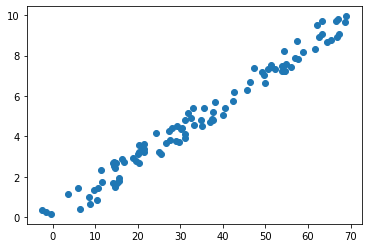

In [14]:
plt.scatter(x_data, y_data)
plt.plot(x_data,W_*x_data + b_, 'r')
plt.show()

In [17]:
multi_raw = np.loadtxt('./LaonPeople/multi_regression.txt')
multi_y = multi_raw[:,2]
multi_x = multi_raw[:,:2]

In [24]:
with tf.Graph().as_default() as multi_regression:
    num_x = 2
    X = tf.placeholder(tf.float32, [None, num_x], name='X')
    Y = tf.placeholder(tf.float32, [None], name ='Y')
    lr = tf.constant(1e-3, tf.float32)
    W = tf.get_variable('W', [1, num_x], tf.float32)
    b = tf.get_variable('b', dtype=tf.float32, initializer = tf.constant(1.,tf.float32))
    
    h = tf.matmul(W,X, transpose_b=True)+b
    cost = tf.reduce_mean(tf.square(tf.subtract(h,Y)))
    train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [25]:
with tf.Session(graph=multi_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        _, l = sess.run([train,cost], feed_dict={X:multi_x, Y:multi_y})
        print("loss",l)
    W_multi, b_multi = sess.run([W,b])

loss 9.972176
loss 9.793595
loss 9.618483
loss 9.446764
loss 9.278372
loss 9.113237
loss 8.951292
loss 8.792471
loss 8.636713
loss 8.483951
loss 8.334126
loss 8.187178
loss 8.04305
loss 7.9016814
loss 7.7630186
loss 7.6270065
loss 7.4935913
loss 7.3627195
loss 7.2343407
loss 7.108405
loss 6.9848623
loss 6.8636665
loss 6.744767
loss 6.6281214
loss 6.5136843
loss 6.4014077
loss 6.2912517
loss 6.183174
loss 6.077132
loss 5.9730883
loss 5.8709993
loss 5.770829
loss 5.672538
loss 5.5760894
loss 5.481447
loss 5.3885765
loss 5.297441
loss 5.208007
loss 5.120242
loss 5.0341125
loss 4.9495864
loss 4.8666325
loss 4.7852206
loss 4.7053204
loss 4.626902
loss 4.5499372
loss 4.4743967
loss 4.4002547
loss 4.3274827
loss 4.2560544
loss 4.1859436
loss 4.1171255
loss 4.049575
loss 3.9832664
loss 3.9181786
loss 3.8542862
loss 3.7915661
loss 3.7299964
loss 3.6695545
loss 3.6102195
loss 3.5519707
loss 3.494786
loss 3.4386456
loss 3.3835304
loss 3.32942
loss 3.2762952
loss 3.2241378
loss 3.1729295
loss 3.12

loss 0.26498184
loss 0.26481512
loss 0.26464853
loss 0.26448214
loss 0.264316
loss 0.26414993
loss 0.26398405
loss 0.2638184
loss 0.263653
loss 0.26348767
loss 0.26332253
loss 0.2631576
loss 0.26299286
loss 0.2628283
loss 0.26266384
loss 0.26249963
loss 0.2623356
loss 0.2621716
loss 0.26200786
loss 0.26184434
loss 0.2616809
loss 0.26151767
loss 0.26135454
loss 0.2611916
loss 0.26102883
loss 0.26086628
loss 0.2607038
loss 0.2605415
loss 0.26037925
loss 0.26021725
loss 0.2600555
loss 0.25989375
loss 0.25973225
loss 0.2595709
loss 0.25940964
loss 0.25924852
loss 0.25908756
loss 0.2589268
loss 0.2587661
loss 0.25860563
loss 0.2584452
loss 0.258285
loss 0.25812486
loss 0.2579649
loss 0.25780514
loss 0.2576455
loss 0.25748587
loss 0.25732648
loss 0.25716722
loss 0.2570081
loss 0.25684905
loss 0.25669017
loss 0.25653145
loss 0.25637287
loss 0.25621453
loss 0.25605622
loss 0.25589803
loss 0.25573987
loss 0.25558203
loss 0.25542426
loss 0.25526655
loss 0.25510904
loss 0.2549516
loss 0.25479427


In [29]:
for j in range(len(multi_x)) :
    sum=0
    for i in range(2):
        sum += W_multi[0][i]*multi_x[j,i]
    print(multi_y[j],sum+b_multi)
print(W_multi, b_multi)

1.0 1.7932621836662292
2.0 2.40434992313385
3.0 3.227548897266388
4.0 3.7325810194015503
5.0 4.661835610866547
[[0.71714336 0.66411555]] 1.0761188


In [31]:
logistic = np.loadtxt('./LaonPeople/logistic_regression.txt')
logistic_x = logistic[:,:-1]
logistic_y = logistic[:,-1]

In [32]:
logistic_x

array([[1., 2., 1.],
       [1., 3., 2.],
       [1., 3., 4.],
       [1., 5., 5.],
       [1., 7., 5.],
       [1., 2., 5.]])

In [33]:
logistic_y

array([0., 0., 0., 1., 1., 1.])

In [41]:
with tf.Graph().as_default() as logistic_regression:
    num_x = 3
    X = tf.placeholder(tf.float32, [None, num_x], name='X')
    Y = tf.placeholder(tf.float32, [None], name='Y')
    lr = tf.constant(1e-1, tf.float32)
    W = tf.get_variable('W', [1, num_x], tf.float32)
    b = tf.get_variable('b', dtype=tf.float32, initializer = tf.constant(1., tf.float32))
    
    h = tf.matmul(W,X, transpose_b=True)+b
    hypothesis = tf.sigmoid(h)
    cost = -tf.reduce_mean((1-Y)*tf.log(hypothesis)+Y*tf.log(1-hypothesis))
    train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [51]:
with tf.Session(graph=logistic_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(8000):
        _,l = sess.run([train,cost], feed_dict = {X:logistic_x, Y:logistic_y})
        print("loss",l)
    W_logistic, b_logistic = sess.run([W,b])

loss 1.8855777
loss 0.9630042
loss 0.5318119
loss 0.4615058
loss 0.45366132
loss 0.45088375
loss 0.44867006
loss 0.446558
loss 0.44449136
loss 0.4424623
loss 0.44046915
loss 0.43851098
loss 0.4365871
loss 0.43469635
loss 0.43283835
loss 0.43101206
loss 0.42921695
loss 0.427452
loss 0.42571667
loss 0.4240102
loss 0.42233184
loss 0.42068097
loss 0.4190568
loss 0.41745877
loss 0.4158862
loss 0.41433847
loss 0.41281494
loss 0.41131505
loss 0.40983808
loss 0.40838352
loss 0.40695086
loss 0.4055396
loss 0.40414906
loss 0.40277877
loss 0.4014283
loss 0.4000971
loss 0.39878464
loss 0.39749053
loss 0.39621437
loss 0.39495552
loss 0.39371374
loss 0.3924886
loss 0.39127955
loss 0.3900863
loss 0.38890854
loss 0.38774577
loss 0.38659772
loss 0.38546398
loss 0.38434425
loss 0.38323823
loss 0.38214555
loss 0.38106596
loss 0.37999913
loss 0.37894467
loss 0.37790248
loss 0.3768722
loss 0.37585354
loss 0.37484625
loss 0.3738502
loss 0.37286496
loss 0.3718904
loss 0.37092638
loss 0.36997256
loss 0.369028

loss 0.21760057
loss 0.2174803
loss 0.2173603
loss 0.21724056
loss 0.21712102
loss 0.21700172
loss 0.21688266
loss 0.21676385
loss 0.21664529
loss 0.21652694
loss 0.21640886
loss 0.21629101
loss 0.21617337
loss 0.216056
loss 0.2159388
loss 0.21582185
loss 0.2157052
loss 0.21558869
loss 0.2154725
loss 0.21535647
loss 0.21524067
loss 0.21512508
loss 0.21500973
loss 0.21489464
loss 0.21477973
loss 0.21466511
loss 0.21455063
loss 0.21443637
loss 0.21432237
loss 0.2142086
loss 0.21409507
loss 0.21398173
loss 0.21386857
loss 0.21375561
loss 0.21364297
loss 0.21353047
loss 0.21341817
loss 0.21330613
loss 0.21319424
loss 0.21308263
loss 0.21297123
loss 0.21285994
loss 0.21274896
loss 0.21263815
loss 0.21252753
loss 0.21241717
loss 0.21230698
loss 0.21219705
loss 0.21208723
loss 0.2119777
loss 0.21186833
loss 0.21175916
loss 0.21165018
loss 0.21154147
loss 0.21143286
loss 0.2113245
loss 0.21121632
loss 0.21110839
loss 0.21100056
loss 0.21089303
loss 0.21078561
loss 0.21067844
loss 0.2105714
los

loss 0.16614859
loss 0.16609706
loss 0.16604559
loss 0.16599412
loss 0.16594277
loss 0.16589141
loss 0.16584009
loss 0.16578875
loss 0.16573758
loss 0.16568637
loss 0.16563521
loss 0.16558413
loss 0.16553305
loss 0.165482
loss 0.165431
loss 0.16537999
loss 0.16532908
loss 0.16527824
loss 0.16522747
loss 0.16517662
loss 0.16512583
loss 0.16507512
loss 0.1650245
loss 0.16497387
loss 0.1649233
loss 0.16487272
loss 0.16482228
loss 0.16477175
loss 0.16472127
loss 0.16467093
loss 0.16462055
loss 0.16457023
loss 0.16451992
loss 0.1644697
loss 0.16441958
loss 0.16436936
loss 0.16431925
loss 0.16426913
loss 0.16421913
loss 0.16416915
loss 0.16411914
loss 0.16406925
loss 0.1640194
loss 0.16396949
loss 0.16391967
loss 0.16386996
loss 0.16382022
loss 0.16377054
loss 0.16372083
loss 0.16367124
loss 0.1636217
loss 0.16357215
loss 0.16352262
loss 0.16347314
loss 0.16342372
loss 0.16337436
loss 0.16332497
loss 0.16327564
loss 0.16322643
loss 0.16317715
loss 0.16312796
loss 0.16307878
loss 0.16302966
l

loss 0.13758881
loss 0.13755544
loss 0.1375222
loss 0.13748884
loss 0.13745557
loss 0.1374223
loss 0.13738902
loss 0.13735576
loss 0.13732253
loss 0.13728938
loss 0.13725616
loss 0.13722296
loss 0.13718985
loss 0.13715667
loss 0.13712354
loss 0.13709046
loss 0.13705735
loss 0.13702425
loss 0.13699122
loss 0.13695814
loss 0.13692516
loss 0.1368921
loss 0.13685912
loss 0.13682614
loss 0.13679324
loss 0.13676028
loss 0.13672735
loss 0.13669443
loss 0.13666153
loss 0.13662869
loss 0.13659577
loss 0.13656296
loss 0.13653015
loss 0.13649727
loss 0.13646452
loss 0.13643172
loss 0.13639897
loss 0.13636617
loss 0.13633344
loss 0.13630079
loss 0.13626806
loss 0.13623536
loss 0.13620272
loss 0.13617003
loss 0.13613741
loss 0.1361048
loss 0.13607217
loss 0.13603958
loss 0.13600706
loss 0.13597448
loss 0.13594192
loss 0.13590941
loss 0.13587695
loss 0.13584441
loss 0.13581197
loss 0.1357795
loss 0.13574702
loss 0.13571464
loss 0.13568224
loss 0.13564979
loss 0.13561746
loss 0.13558508
loss 0.135552

loss 0.11803693
loss 0.11801236
loss 0.11798775
loss 0.117963195
loss 0.11793858
loss 0.11791407
loss 0.11788947
loss 0.11786497
loss 0.11784048
loss 0.117815904
loss 0.11779138
loss 0.11776686
loss 0.11774238
loss 0.1177179
loss 0.11769337
loss 0.11766896
loss 0.11764452
loss 0.11762002
loss 0.11759562
loss 0.117571205
loss 0.117546804
loss 0.11752239
loss 0.11749798
loss 0.11747358
loss 0.117449194
loss 0.11742485
loss 0.11740047
loss 0.11737614
loss 0.11735179
loss 0.11732743
loss 0.11730311
loss 0.117278874
loss 0.11725453
loss 0.11723024
loss 0.11720594
loss 0.11718165
loss 0.11715742
loss 0.11713317
loss 0.11710895
loss 0.117084704
loss 0.11706043
loss 0.117036246
loss 0.117012106
loss 0.11698785
loss 0.11696363
loss 0.11693949
loss 0.116915286
loss 0.11689117
loss 0.116866976
loss 0.116842866
loss 0.11681875
loss 0.11679465
loss 0.11677053
loss 0.11674637
loss 0.11672231
loss 0.116698265
loss 0.116674185
loss 0.116650105
loss 0.11662605
loss 0.11660197
loss 0.11657796
loss 0.116

loss 0.103069514
loss 0.10305039
loss 0.1030313
loss 0.103012286
loss 0.10299322
loss 0.10297412
loss 0.102955066
loss 0.10293604
loss 0.10291699
loss 0.102897994
loss 0.102878965
loss 0.10285995
loss 0.10284093
loss 0.102821864
loss 0.102802925
loss 0.102783926
loss 0.10276494
loss 0.10274595
loss 0.102726966
loss 0.10270802
loss 0.102689065
loss 0.10267013
loss 0.10265114
loss 0.1026322
loss 0.10261328
loss 0.10259432
loss 0.102575384
loss 0.10255653
loss 0.10253761
loss 0.10251868
loss 0.10249984
loss 0.10248094
loss 0.10246206
loss 0.102443166
loss 0.10242424
loss 0.10240541
loss 0.10238659
loss 0.10236774
loss 0.10234886
loss 0.10233003
loss 0.10231123
loss 0.10229238
loss 0.102273606
loss 0.10225475
loss 0.10223597
loss 0.102217175
loss 0.102198325
loss 0.102179565
loss 0.10216082
loss 0.102142006
loss 0.10212328
loss 0.102104515
loss 0.10208577
loss 0.10206699
loss 0.102048285
loss 0.1020295
loss 0.10201075
loss 0.10199211
loss 0.10197333
loss 0.10195466
loss 0.101935945
loss 0.

loss 0.09262117
loss 0.09260551
loss 0.09258983
loss 0.09257415
loss 0.092558526
loss 0.092542894
loss 0.09252721
loss 0.09251159
loss 0.09249595
loss 0.092480294
loss 0.092464656
loss 0.09244898
loss 0.092433415
loss 0.09241778
loss 0.09240219
loss 0.092386566
loss 0.09237096
loss 0.09235536
loss 0.09233978
loss 0.092324175
loss 0.09230857
loss 0.092292994
loss 0.09227747
loss 0.09226188
loss 0.092246294
loss 0.09223071
loss 0.09221519
loss 0.092199676
loss 0.092184074
loss 0.09216856
loss 0.09215305
loss 0.09213746
loss 0.092121996
loss 0.092106454
loss 0.09209093
loss 0.09207543
loss 0.09205993
loss 0.092044435
loss 0.09202889
loss 0.092013426
loss 0.09199796
loss 0.09198252
loss 0.09196698
loss 0.09195152
loss 0.09193606
loss 0.09192053
loss 0.091905154
loss 0.09188966
loss 0.09187424
loss 0.091858804
loss 0.09184336
loss 0.09182788
loss 0.091812484
loss 0.09179706
loss 0.09178165
loss 0.09176618
loss 0.0917508
loss 0.091735385
loss 0.09172002
loss 0.091704585
loss 0.09168918
loss 

loss 0.083886646
loss 0.08387355
loss 0.08386048
loss 0.083847456
loss 0.08383432
loss 0.08382126
loss 0.08380824
loss 0.08379521
loss 0.083782196
loss 0.083769105
loss 0.0837561
loss 0.083743006
loss 0.08373001
loss 0.08371695
loss 0.08370399
loss 0.08369097
loss 0.08367792
loss 0.08366493
loss 0.08365192
loss 0.083638914
loss 0.08362591
loss 0.08361285
loss 0.083599865
loss 0.083586924
loss 0.08357391
loss 0.08356091
loss 0.08354795
loss 0.08353496
loss 0.08352206
loss 0.083509065
loss 0.083496116
loss 0.08348313
loss 0.083470196
loss 0.083457224
loss 0.083444215
loss 0.0834313
loss 0.08341834
loss 0.08340541
loss 0.0833925
loss 0.083379574
loss 0.083366625
loss 0.08335376
loss 0.0833408
loss 0.083327875
loss 0.08331497
loss 0.08330206
loss 0.083289154
loss 0.08327628
loss 0.083263315
loss 0.08325045
loss 0.08323752
loss 0.08322467
loss 0.08321176
loss 0.08319891
loss 0.08318602
loss 0.08317313
loss 0.083160244
loss 0.083147414
loss 0.0831346
loss 0.08312168
loss 0.083108865
loss 0.0

loss 0.07592752
loss 0.07591657
loss 0.075905725
loss 0.07589483
loss 0.07588398
loss 0.07587314
loss 0.07586223
loss 0.07585142
loss 0.07584053
loss 0.07582965
loss 0.075818785
loss 0.07580793
loss 0.0757971
loss 0.07578621
loss 0.07577539
loss 0.07576453
loss 0.07575371
loss 0.07574287
loss 0.075731985
loss 0.07572121
loss 0.075710334
loss 0.07569953
loss 0.0756887
loss 0.07567784
loss 0.07566707
loss 0.07565626
loss 0.07564544
loss 0.0756346
loss 0.07562379
loss 0.075613
loss 0.0756022
loss 0.07559139
loss 0.07558062
loss 0.075569846
loss 0.07555899
loss 0.07554824
loss 0.07553744
loss 0.07552668
loss 0.075515874
loss 0.07550511
loss 0.07549431
loss 0.07548361
loss 0.07547282
loss 0.07546205
loss 0.07545127
loss 0.075440496
loss 0.07542975
loss 0.075419016
loss 0.0754082
loss 0.07539749
loss 0.075386725
loss 0.07537597
loss 0.07536527
loss 0.07535451
loss 0.075343825
loss 0.07533306
loss 0.075322315
loss 0.07531159
loss 0.07530088
loss 0.07529014
loss 0.07527942
loss 0.075268716
los

loss 0.06949506
loss 0.06948585
loss 0.069476575
loss 0.06946736
loss 0.06945811
loss 0.06944889
loss 0.069439635
loss 0.06943046
loss 0.06942118
loss 0.069411956
loss 0.069402725
loss 0.06939351
loss 0.06938432
loss 0.069375075
loss 0.06936585
loss 0.069356635
loss 0.069347456
loss 0.06933819
loss 0.06932903
loss 0.069319814
loss 0.06931063
loss 0.069301374
loss 0.069292225
loss 0.069283
loss 0.06927375
loss 0.0692646
loss 0.0692554
loss 0.069246255
loss 0.069237016
loss 0.069227874
loss 0.0692187
loss 0.06920951
loss 0.06920032
loss 0.06919114
loss 0.06918201
loss 0.0691728
loss 0.069163665
loss 0.069154434
loss 0.069145344
loss 0.069136135
loss 0.069127
loss 0.06911787
loss 0.06910869
loss 0.06909954
loss 0.06909041
loss 0.06908125
loss 0.06907209
loss 0.06906295
loss 0.0690538
loss 0.06904467
loss 0.06903556
loss 0.06902644
loss 0.06901727
loss 0.06900815
loss 0.06899903
loss 0.06898993
loss 0.06898081
loss 0.06897167
loss 0.0689625
loss 0.06895342
loss 0.06894434
loss 0.068935215


loss 0.0639231
loss 0.06391517
loss 0.06390724
loss 0.063899375
loss 0.063891426
loss 0.06388354
loss 0.06387564
loss 0.063867725
loss 0.06385982
loss 0.0638519
loss 0.063844
loss 0.06383613
loss 0.06382823
loss 0.063820265
loss 0.063812405
loss 0.063804515
loss 0.0637966
loss 0.063788705
loss 0.063780874
loss 0.06377294
loss 0.06376509
loss 0.06375723
loss 0.06374932
loss 0.06374145
loss 0.063733585
loss 0.06372569
loss 0.06371782
loss 0.06370995
loss 0.06370206
loss 0.0636942
loss 0.06368629
loss 0.063678436
loss 0.0636706
loss 0.06366271
loss 0.06365484
loss 0.063647024
loss 0.06363917
loss 0.06363132
loss 0.06362348
loss 0.06361559
loss 0.06360778
loss 0.06359991
loss 0.063592054
loss 0.063584246
loss 0.0635764
loss 0.06356854
loss 0.06356067
loss 0.06355283
loss 0.06354506
loss 0.06353722
loss 0.06352935
loss 0.063521534
loss 0.063513756
loss 0.06350591
loss 0.06349806
loss 0.06349025
loss 0.063482456
loss 0.06347462
loss 0.063466765
loss 0.063458934
loss 0.06345118
loss 0.0634433

loss 0.059038702
loss 0.059031818
loss 0.05902503
loss 0.059018165
loss 0.05901137
loss 0.059004527
loss 0.0589977
loss 0.058990866
loss 0.0589841
loss 0.058977257
loss 0.058970448
loss 0.05896363
loss 0.058956813
loss 0.05894998
loss 0.0589432
loss 0.058936417
loss 0.058929604
loss 0.058922753
loss 0.058915954
loss 0.058909167
loss 0.058902334
loss 0.058895558
loss 0.05888876
loss 0.058881965
loss 0.0588752
loss 0.05886838
loss 0.058861595
loss 0.058854837
loss 0.058848005
loss 0.058841247
loss 0.058834415
loss 0.05882767
loss 0.05882086
loss 0.05881409
loss 0.058807284
loss 0.05880053
loss 0.05879368
loss 0.058786955
loss 0.05878018
loss 0.058773432
loss 0.058766615
loss 0.05875991
loss 0.058753084
loss 0.058746357
loss 0.058739558
loss 0.05873284
loss 0.058726046
loss 0.05871931
loss 0.058712516
loss 0.058705766
loss 0.058699023
loss 0.058692217
loss 0.058685467
loss 0.058678705
loss 0.058671962
loss 0.05866525
loss 0.058658477
loss 0.05865172
loss 0.05864502
loss 0.05863827
loss 0.

loss 0.054789763
loss 0.054783802
loss 0.05477786
loss 0.054771896
loss 0.05476599
loss 0.054760035
loss 0.054754112
loss 0.05474821
loss 0.054742288
loss 0.054736327
loss 0.054730386
loss 0.05472444
loss 0.054718554
loss 0.054712612
loss 0.054706663
loss 0.054700773
loss 0.054694857
loss 0.0546889
loss 0.05468301
loss 0.054677088
loss 0.05467117
loss 0.05466525
loss 0.05465938
loss 0.054653425
loss 0.05464756
loss 0.05464162
loss 0.054635685
loss 0.054629777
loss 0.0546239
loss 0.05461797
loss 0.054612104
loss 0.05460615
loss 0.054600257
loss 0.05459437
loss 0.0545885
loss 0.054582566
loss 0.05457669
loss 0.054570805
loss 0.054564875
loss 0.054558992
loss 0.054553103
loss 0.05454724
loss 0.054541353
loss 0.054535437
loss 0.054529563
loss 0.054523688
loss 0.054517746
loss 0.054511905
loss 0.054506022
loss 0.05450013
loss 0.05449428
loss 0.05448835
loss 0.054482486
loss 0.054476615
loss 0.054470733
loss 0.054464847
loss 0.054458987
loss 0.054453146
loss 0.05444725
loss 0.05444138
loss 0

In [52]:
for j in range(len(logistic_x)):
    sum = 0
    for i in range(3):
        sum += W_logistic[0][i]*logistic_x[j,i]
    print('label', logistic_y[j], 'probability', 1/(1+math.exp(sum+b_logistic)))
print(W_logistic, b_logistic)

label 0.0 probability 3.2052439676966096e-07
label 0.0 probability 3.228735428184072e-05
label 0.0 probability 0.16644803447818687
label 1.0 probability 0.9626408034215743
label 1.0 probability 0.9768947825670619
label 1.0 probability 0.9245803665979915
[[ 9.771128   -0.24760963 -4.364895  ]] 10.042294


In [44]:
import math